
  
<div style="background-color: Olive; padding: 40px; font-size: 40px;">
           Evaluating Regression Models
</div>
  

## Exercises
Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import wrangle as w
from wrangle import wrangle_zillow,split_data
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Acquire the zillow dataset, prepare data and returns clean data frame

df = w.wrangle_zillow()


In [7]:
df.head()

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


In [3]:
train, validate, test = w.split_data(df)

train: 1498164 (70% of 2140235)
validate: 321035 (15% of 2140235)
test: 321036 (15% of 2140235)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1498164 entries, 1007466 to 1702727
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   bedrooms   1498164 non-null  int64  
 1   bathrooms  1498164 non-null  float64
 2   area       1498164 non-null  int64  
 3   taxvalue   1498164 non-null  int64  
 4   yearbuilt  1498164 non-null  int64  
 5   taxamount  1498164 non-null  float64
 6   county     1498164 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 91.4+ MB


In [6]:
#Before scaling
train.sample(2)

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
368724,3,1.0,1105,217721,1949,2444.55,LA
1055986,4,3.0,2675,544098,1971,6446.42,Ventura


In [ ]:
scale the data robust or minmax scaler

In [9]:

# Create a list of numeric column names (excluding non-numeric columns)
#Exclude the 'county' column, which is non-numeric.

numeric_columns = ['bedrooms', 'bathrooms', 'area', 'taxvalue', 'yearbuilt', 'taxamount']

# Initialize the MinMaxScaler
mms = MinMaxScaler()

# Fit and transform the train dataset using only the numeric columns
train[numeric_columns] = mms.fit_transform(train[numeric_columns])

# Transform the validate and test datasets using the same scaler and numeric columns
validate[numeric_columns] = mms.transform(validate[numeric_columns])
test[numeric_columns] = mms.transform(test[numeric_columns])




In [10]:
#After scaling 
train.sample(2)

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
1675167,0.166667,0.03125,0.001115,0.000610,0.697674,0.000931,LA
1649159,0.166667,0.06250,0.001304,0.001969,0.706977,0.002200,LA


 ## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.


Here is some sample code to get you started:


from sklearn.linear_model import LinearRegression
#### assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

Modify and add to the code above as necessary for it to work with the zillow dataset.


In [12]:
train.head(2)

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
1007466,0.166667,0.0625,0.001523,0.002672,0.832558,0.002747,LA
615622,0.166667,0.0625,0.001324,0.002612,0.706977,0.002797,LA


In [14]:
#drop extra columns
train = train.drop(columns=['bedrooms','bathrooms',
                    'yearbuilt','taxamount', 'county'])

In [15]:
#After column drop
train.head(2)

,area,taxvalue
1007466,0.001523,0.002672
615622,0.001324,0.002612


In [ ]:
# Check Min and Max(The minimum should be 0, and the 
# maximum should be 1. Purpose of this is to ensure that the
# column is scaled to a consistent range [0, 1])

In [19]:
train.area.min(), train.taxvalue.min()

(0.0, 0.0)

In [18]:
train.area.max(), train.taxvalue.max()


(1.0, 1.0)

In [28]:
# Define X_train and y_train as follows
X_train = train[['area']]  # Feature (independent variable)
y_train = train['taxvalue']  # Target variable (dependent variable)

X_validate = validate[['area']]
y_validate = validate.taxvalue

X_test = test[['area']]
y_test = test.taxvalue

# Creating and fitting an Ordinary Least Squares (OLS) 
# linear regression model 
model = LinearRegression().fit(X_train, y_train)

# Make predictions (compute yhat)
yhat = model.predict(X_train)

# Now, yhat contains the predicted values for taxvalue based on area


Notes:-
Ordinary Least Squares(OLS)
The goal of OLS is to find the linear relationship between the independent variables (features) and the dependent variable (target) that minimizes the sum of the squared differences between the observed and predicted values.

In [30]:
#save yhat(i.e predictions) into train df
train['yhat'] = yhat

In [31]:
train.head(2)

,area,taxvalue,yhat
1007466,0.001523,0.002672,0.004046
615622,0.001324,0.002612,0.003556


## 3 Plot the residuals for the linear regression model that you made.

In [35]:
#calculate residuals (acutal - prediction)
train['residuals'] = train.taxvalue - train.yhat


In [36]:
train.head(2)

,area,taxvalue,yhat,residuals
1007466,0.001523,0.002672,0.004046,-0.001374
615622,0.001324,0.002612,0.003556,-0.000943


In [ ]:
# Residual plot using the predicted values yhat and the actual values 
# y_train. This plot helps you visualize the residuals
# (the differences between actual and predicted values) 
# and check for any patterns or outliers in your model's performance.

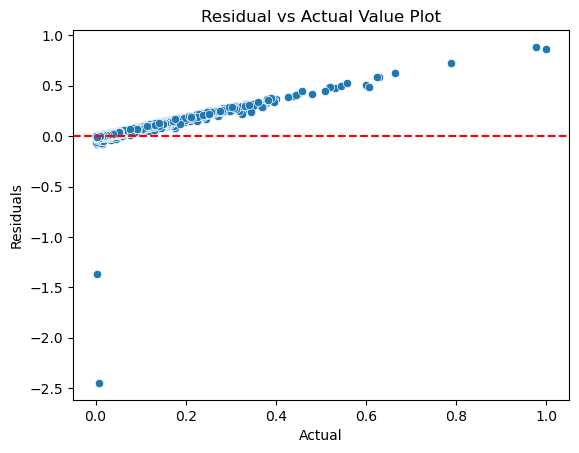

In [39]:
# Make scatterplot of y-value vs residuals
sns.scatterplot(data=train, x='taxvalue', y='residuals')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual vs Actual Value Plot')
plt.show()

## 4 Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [55]:
#Sum of Squared Errors (SSE):
SSE = MSE * len(train)
print("Sum of Squared Errors (SSE):", SSE)

Sum of Squared Errors (SSE): 67.90081617414633


In [58]:
ESS = ((train.yhat - train.taxvalue.mean())**2).sum()
print("Explained Sum of Squares (ESS):", ESS)

Explained Sum of Squares (ESS): 17.216048980209305


In [59]:
TSS = ESS + SSE
print("Total Sum of Squares (TSS):", TSS)

Total Sum of Squares (TSS): 85.11686515435564


In [53]:
MSE = mean_squared_error(train.taxvalue, train.yhat)
print("Mean Squared Error (MSE):",MSE)

Mean Squared Error (MSE): 4.532268575012237e-05


In [56]:
RMSE = MSE**.5
print("Root Mean Squared Error (RMSE):",RMSE)

Root Mean Squared Error (RMSE): 0.006732212544930705


## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [60]:
train['baseline'] = train.taxvalue.mean()


In [62]:
train.head(2)

,area,taxvalue,yhat,residuals,baseline
1007466,0.001523,0.002672,0.004046,-0.001374,0.005106
615622,0.001324,0.002612,0.003556,-0.000943,0.005106


In [66]:
# mean squared error
MSE_baseline = mean_squared_error(train.taxvalue, train.baseline)
print("Mean Squared Error (MSE):",MSE_baseline)


Mean Squared Error (MSE): 5.6814117249078334e-05


In [68]:
# sum of squared errors
SSE_baseline = MSE_baseline * len(train)
print("Sum of Squared Error (SSE):",SSE_baseline)


Sum of Squared Error (SSE): 85.11686515434819


In [69]:
# Root mean squared error
RMSE_baseline = MSE_baseline**.5
print("Root Mean Squared Error (RMSE):",RMSE_baseline)


Root Mean Squared Error (RMSE): 0.0075375139966091164


In [ ]:
# OR

In [46]:
# Calculate the average of taxvaluedollarcnt in the training data (baseline prediction)
baseline_prediction = np.mean(y_train)

# Calculate the squared differences between actual values and baseline prediction
baseline_squared_errors = (y_train - baseline_prediction) ** 2

# Calculate the Sum of Squared Errors (SSE) for the baseline model
baseline_sse = baseline_squared_errors.sum()

# Calculate the Mean Squared Error (MSE) for the baseline model
baseline_mse = baseline_sse / len(y_train)

# Calculate the Root Mean Squared Error (RMSE) for the baseline model
baseline_rmse = np.sqrt(baseline_mse)

print("Sum of Squared Errors (SSE) for Baseline Model:", baseline_sse)
print("Mean Squared Error (MSE) for Baseline Model:", baseline_mse)
print("Root Mean Squared Error (RMSE) for Baseline Model:", baseline_rmse)


Sum of Squared Errors (SSE) for Baseline Model: 85.11686515434819
Mean Squared Error (MSE) for Baseline Model: 5.6814117249078334e-05
Root Mean Squared Error (RMSE) for Baseline Model: 0.0075375139966091164


Notes:-
baseline_prediction is the constant prediction, which is the average of 'taxvaluedollarcnt' in the training data.
baseline_squared_errors contains the squared differences between actual values and the baseline prediction for each data point.
baseline_sse is the Sum of Squared Errors (SSE) for the baseline model.
baseline_mse is the Mean Squared Error (MSE) for the baseline model.
baseline_rmse is the Root Mean Squared Error (RMSE) for the baseline model.
These metrics provide a baseline for comparison with the performance of your linear regression model.


    


## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.






In [71]:

# SSE for your model is stored in the variable 'sse'

# Calculate SSE for the baseline model
baseline_prediction = np.mean(y_train)
baseline_squared_errors = (y_train - baseline_prediction) ** 2
baseline_sse = baseline_squared_errors.sum()

# Compare SSE for your model and baseline model
if sse < baseline_sse:
    print("My OSL model performs better than the baseline model.")
elif sse > baseline_sse:
    print("My OSL model performs worse than the baseline model.")
else:
    print("My OSL model performs equally as the baseline model.")


My OSL model performs better than the baseline model.


## 7.What is the amount of variance explained in your model?

To calculate the amount of variance explained by your model, you can use the coefficient of determination, which is often denoted as R-squared (R²)

In [48]:
# Calculate R-squared (amount of variance explained)
r_squared = 1 - (sse / tss)

print("R-squared (Amount of Variance Explained):", r_squared)


R-squared (Amount of Variance Explained): 0.20226366359925063


In [ ]:
# OR

In [72]:
#manually
R2 = ESS / TSS
R2


0.20226366359932038

In [ ]:
# OR

In [76]:
#from sklearn
r2_score(train.taxvalue, train.yhat)

0.20226366359925063

## 8. Is your model better than the baseline model?

In [77]:
RMSE_baseline - RMSE


0.0008053014516784113

To determine whether your model is better, you typically consider factors such as the metric used for evaluation (e.g., SSE, MSE, R-squared), domain knowledge, and the goals of your analysis.

- If your model has lower error metrics (e.g., lower SSE, lower MSE, higher R-squared) compared to the baseline model, it suggests that your model is performing better in terms of prediction accuracy. Lower error metrics generally indicate a better fit to the data.



  - Yes, the model performs better than the baseline model but is still pretty bad and
  -   we don't want to use it.
 

## 9. Create a file named evaluate.py that contains the following functions.

 - plot_residuals(y, yhat): creates a residual plot
 - regression_errors(y, yhat): returns the following values:
 - sum of squared errors (SSE)
 - explained sum of squares (ESS)
 - total sum of squares (TSS)
 - mean squared error (MSE)
 - root mean squared error (RMSE)
 - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
 - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [49]:
#copy this to evaluate.py

def plot_residuals(y, yhat):
    """
    Create a residual plot.

    Args:
    - y: Actual target values.
    - yhat: Predicted target values.

    Returns:
    None
    """
    residuals = y - yhat
    plt.figure(figsize=(10, 6))
    plt.scatter(y, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Actual")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()

def regression_errors(y, yhat):
    """
    Calculate regression error metrics.

    Args:
    - y: Actual target values.
    - yhat: Predicted target values.

    Returns:
    - sse: Sum of Squared Errors
    - ess: Explained Sum of Squares
    - tss: Total Sum of Squares
    - mse: Mean Squared Error
    - rmse: Root Mean Squared Error
    """
    sse = ((y - yhat) ** 2).sum()
    ess = ((yhat - y.mean()) ** 2).sum()
    tss = ((y - y.mean()) ** 2).sum()
    mse = sse / len(y)
    rmse = np.sqrt(mse)
    return sse, ess, tss, mse, rmse

def baseline_mean_errors(y):
    """
    Calculate regression error metrics for the baseline model.

    Args:
    - y: Actual target values.

    Returns:
    - sse_baseline: SSE for the baseline model
    - mse_baseline: MSE for the baseline model
    - rmse_baseline: RMSE for the baseline model
    """
    y_baseline = np.mean(y)
    sse_baseline = ((y - y_baseline) ** 2).sum()
    mse_baseline = sse_baseline / len(y)
    rmse_baseline = np.sqrt(mse_baseline)
    return sse_baseline, mse_baseline, rmse_baseline

def better_than_baseline(y, yhat):
    """
    Determine if the model performs better than the baseline.

    Args:
    - y: Actual target values.
    - yhat: Predicted target values.

    Returns:
    - True if the model performs better than the baseline, otherwise False.
    """
    sse, _, _, _, _ = regression_errors(y, yhat)
    sse_baseline, _, _ = baseline_mean_errors(y)
    return sse < sse_baseline  # Model is better if its SSE is lower than baseline SSE
